In [1]:
# coding:utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, metrics
from datetime import datetime as dt
from sklearn.preprocessing import LabelEncoder


# pandas
import pandas as pd
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_colwidth", 100)

# LightGBM
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 交差検証
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# AUC
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
purchase_df = pd.read_csv('../input/purchase_record.csv')
user_df = pd.read_csv('../input/user_info.csv')
test_df = pd.read_csv('../input/purchase_record_test.csv')

In [3]:
purchase_df.shape

(1803574, 14)

In [4]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803574 entries, 0 to 1803573
Data columns (total 14 columns):
user_id        object
purchase_id    object
date           object
product_id     object
parts_1        object
parts_2        object
parts_3        object
parts_4        object
parts_5        object
parts_6        object
parts_7        object
parts_8        object
parts_9        object
purchase       int64
dtypes: int64(1), object(13)
memory usage: 192.6+ MB


In [5]:
purchase_df.head()

,user_id,purchase_id,date,product_id,parts_1,parts_2,parts_3,parts_4,parts_5,parts_6,parts_7,parts_8,parts_9,purchase
0,uid_100,pid_0000000000,2017-09-27,product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,uid_100,pid_0000000001,2017-09-27,product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,uid_100002,pid_0000000002,2017-11-23,product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,uid_100002,pid_0000000003,2017-11-23,product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,uid_100003,pid_0000000004,2018-02-07,product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [6]:
purchase_df.fillna(0, inplace=True)

In [7]:
purchase_df.purchase.value_counts()

0    928044
1    875530
Name: purchase, dtype: int64

In [8]:
user_df.shape

(189114, 32)

In [9]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189114 entries, 0 to 189113
Data columns (total 32 columns):
user_id         189114 non-null object
date            189114 non-null object
attribute_1     189114 non-null object
attribute_2     189114 non-null object
attribute_3     189114 non-null object
attribute_4     189114 non-null bool
attribute_5     189114 non-null bool
attribute_6     189114 non-null bool
attribute_7     189114 non-null bool
attribute_8     189114 non-null bool
attribute_9     189114 non-null bool
attribute_10    189114 non-null bool
attribute_11    189114 non-null bool
attribute_12    189114 non-null bool
attribute_13    189114 non-null bool
attribute_14    189114 non-null bool
attribute_15    189114 non-null bool
attribute_16    189114 non-null bool
attribute_17    189114 non-null bool
attribute_18    189114 non-null bool
attribute_19    189114 non-null bool
attribute_20    189114 non-null bool
attribute_21    189114 non-null bool
attribute_22    189114 non-n

In [10]:
user_df.head()

,user_id,date,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,...,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30
0,uid_100,2016-06-29,id 5,id 5,id 5,True,False,False,True,True,...,True,False,True,True,False,False,True,True,True,False
1,uid_100002,2016-01-06,id 28,id 9,id 5,False,False,True,True,False,...,False,False,True,True,True,True,True,True,True,False
2,uid_100003,2017-06-10,id 4,id 8,id 5,True,True,True,True,True,...,True,False,False,True,True,True,True,False,True,True
3,uid_100004,2017-07-20,id 40,id 25,id 9,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,uid_100006,2017-07-27,id 40,id 25,id 9,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False


In [11]:
train_df = pd.merge(purchase_df, user_df, how='left', on='user_id')

In [12]:
train_df.head()

,user_id,purchase_id,date_x,product_id,parts_1,parts_2,parts_3,parts_4,parts_5,parts_6,...,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30
0,uid_100,pid_0000000000,2017-09-27,product 2,0,0,0,0,0,0,...,True,False,True,True,False,False,True,True,True,False
1,uid_100,pid_0000000001,2017-09-27,product 2,0,0,0,0,0,0,...,True,False,True,True,False,False,True,True,True,False
2,uid_100002,pid_0000000002,2017-11-23,product 2,0,0,0,0,0,0,...,False,False,True,True,True,True,True,True,True,False
3,uid_100002,pid_0000000003,2017-11-23,product 2,0,0,0,0,0,0,...,False,False,True,True,True,True,True,True,True,False
4,uid_100003,pid_0000000004,2018-02-07,product 2,0,0,0,0,0,0,...,True,False,False,True,True,True,True,False,True,True


In [13]:
# train_dfから不要列を削除する
# train_df = train_df.drop('date_x', axis=1)
# train_df = train_df.drop('date_y', axis=1)
# train_df = train_df.drop('product_id', axis=1)
train_df = train_df.drop('user_id', axis=1)

# product_idをfrequency_encodingする
grouped_product_id = train_df.groupby("product_id").size().reset_index(name='product_id_counts') # 出現回数を計算
# もとのデータセットにカテゴリーをproduct_idとして結合
train_df = train_df.merge(grouped_product_id, how = "left", on = "product_id")
train_df["product_id_frequency"] = train_df["product_id_counts"]/train_df["product_id_counts"].count()
#product_idを削除する
train_df = train_df.drop('product_id_counts', axis=1)

# データ開始から何日経っているかを表す列を追加date_x
train_df['date_x_days'] = np.nan # 欠損値で埋める
train_df['date_x_days'] = train_df.index.values # インデックス値を使用
train_df['date_x_days'] = pd.to_datetime(train_df['date_x']) # 日付データにリフォーマット
train_df['date_x_days'] = train_df['date_x_days'] - dt(2015,1,1)
train_df['date_x_days'] = train_df['date_x_days'].dt.days
# データ開始から何日経っているかを表す列を追加date_y
train_df['date_y_days'] = np.nan # 欠損値で埋める
train_df['date_y_days'] = train_df.index.values # インデックス値を使用
train_df['date_y_days'] = pd.to_datetime(train_df['date_y']) # 日付データにリフォーマット
train_df['date_y_days'] = train_df['date_y_days'] - dt(2015,1,1)
train_df['date_y_days'] = train_df['date_y_days'].dt.days
# 日付列削除
train_df = train_df.drop('date_x', axis=1)
train_df = train_df.drop('date_y', axis=1)

In [14]:
train_df.head()

,purchase_id,product_id,parts_1,parts_2,parts_3,parts_4,parts_5,parts_6,parts_7,parts_8,...,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,product_id_frequency,date_x_days,date_y_days
0,pid_0000000000,product 2,0,0,0,0,0,0,0,0,...,True,False,False,True,True,True,False,0.450107,1000,545
1,pid_0000000001,product 2,0,0,0,0,0,0,0,0,...,True,False,False,True,True,True,False,0.450107,1000,545
2,pid_0000000002,product 2,0,0,0,0,0,0,0,0,...,True,True,True,True,True,True,False,0.450107,1057,370
3,pid_0000000003,product 2,0,0,0,0,0,0,0,0,...,True,True,True,True,True,True,False,0.450107,1057,370
4,pid_0000000004,product 2,0,0,0,0,0,0,0,0,...,True,True,True,True,False,True,True,0.450107,1133,891


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803574 entries, 0 to 1803573
Data columns (total 45 columns):
purchase_id             object
product_id              object
parts_1                 object
parts_2                 object
parts_3                 object
parts_4                 object
parts_5                 object
parts_6                 object
parts_7                 object
parts_8                 object
parts_9                 object
purchase                int64
attribute_1             object
attribute_2             object
attribute_3             object
attribute_4             bool
attribute_5             bool
attribute_6             bool
attribute_7             bool
attribute_8             bool
attribute_9             bool
attribute_10            bool
attribute_11            bool
attribute_12            bool
attribute_13            bool
attribute_14            bool
attribute_15            bool
attribute_16            bool
attribute_17            bool
attribute_18     

In [16]:
train_df.shape

(1803574, 45)

In [17]:
train_df.isnull().sum().sum()

0

In [18]:
# %%time
# pdp.ProfileReport(train_df)

In [19]:
test_df = pd.merge(test_df, user_df, how='left', on='user_id')

In [20]:
test_df.shape

(215041, 44)

In [21]:
# sample_train_df = train_df.sample(n=len(train_df)//500)

In [22]:
# sample_test_df = test_df.sample(n=len(test_df)//500)

In [23]:
# train_df = sample_train_df
# test_df = sample_test_df

In [24]:
# test_dfから不要列を削除する
# test_df = test_df.drop('product_id', axis=1)
test_df = test_df.drop('user_id', axis=1)

# product_idをfrequency_encodingする
grouped_product_id = test_df.groupby("product_id").size().reset_index(name='product_id_counts') # 出現回数を計算
# もとのデータセットにカテゴリーをproduct_idとして結合
test_df = test_df.merge(grouped_product_id, how = "left", on = "product_id")
test_df["product_id_frequency"] = test_df["product_id_counts"]/test_df["product_id_counts"].count()
#product_idを削除する
test_df = test_df.drop('product_id_counts', axis=1)

# データ開始から何日経っているかを表す列を追加date_x
test_df['date_x_days'] = np.nan # 欠損値で埋める
test_df['date_x_days'] = test_df.index.values # インデックス値を使用
test_df['date_x_days'] = pd.to_datetime(test_df['date_x']) # 日付データにリフォーマット
test_df['date_x_days'] = test_df['date_x_days'] - dt(2015,1,1)
test_df['date_x_days'] = test_df['date_x_days'].dt.days
# データ開始から何日経っているかを表す列を追加date_y
test_df['date_y_days'] = np.nan # 欠損値で埋める
test_df['date_y_days'] = test_df.index.values # インデックス値を使用
test_df['date_y_days'] = pd.to_datetime(test_df['date_y']) # 日付データにリフォーマット
test_df['date_y_days'] = test_df['date_y_days'] - dt(2015,1,1)
test_df['date_y_days'] = test_df['date_y_days'].dt.days
# 日付列削除
test_df = test_df.drop('date_x', axis=1)
test_df = test_df.drop('date_y', axis=1)


In [25]:
test_df.head()

,purchase_id,product_id,parts_1,parts_2,parts_3,parts_4,parts_5,parts_6,parts_7,parts_8,...,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,product_id_frequency,date_x_days,date_y_days
0,pid_0001803575,product 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,True,True,True,False,0.170023,1333,545
1,pid_0001803576,product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,True,True,True,False,0.431355,1311,545
2,pid_0001803577,product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,True,True,True,False,0.431355,1333,545
3,pid_0001803578,product 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,True,True,True,False,0.170023,1311,545
4,pid_0001803579,product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,True,True,0.431355,1309,891


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803574 entries, 0 to 1803573
Data columns (total 45 columns):
purchase_id             object
product_id              object
parts_1                 object
parts_2                 object
parts_3                 object
parts_4                 object
parts_5                 object
parts_6                 object
parts_7                 object
parts_8                 object
parts_9                 object
purchase                int64
attribute_1             object
attribute_2             object
attribute_3             object
attribute_4             bool
attribute_5             bool
attribute_6             bool
attribute_7             bool
attribute_8             bool
attribute_9             bool
attribute_10            bool
attribute_11            bool
attribute_12            bool
attribute_13            bool
attribute_14            bool
attribute_15            bool
attribute_16            bool
attribute_17            bool
attribute_18     

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215041 entries, 0 to 215040
Data columns (total 44 columns):
purchase_id             215041 non-null object
product_id              215041 non-null object
parts_1                 21006 non-null object
parts_2                 21006 non-null object
parts_3                 21006 non-null object
parts_4                 21006 non-null object
parts_5                 21006 non-null object
parts_6                 21006 non-null object
parts_7                 21006 non-null object
parts_8                 21006 non-null object
parts_9                 21006 non-null object
attribute_1             215041 non-null object
attribute_2             215041 non-null object
attribute_3             215041 non-null object
attribute_4             215041 non-null bool
attribute_5             215041 non-null bool
attribute_6             215041 non-null bool
attribute_7             215041 non-null bool
attribute_8             215041 non-null bool
attribute_9    

In [28]:
%%time
# train = pd.get_dummies(train_df, drop_first=True)
train = pd.get_dummies(train_df, columns=['product_id', 'attribute_1', 'attribute_2', 'attribute_3', 'parts_1', 'parts_2', 'parts_3', 'parts_4', 'parts_5', 'parts_6', 'parts_7', 'parts_8', 'parts_9'], drop_first=True)
train = train * 1
train = train.set_index('purchase_id')
# train = pd.get_dummies(train_df, columns!=['purchase_id', 'purchase'], drop_first=True)



CPU times: user 3.52 s, sys: 877 ms, total: 4.4 s
Wall time: 4.39 s


In [29]:
%%time
# test = pd.get_dummies(test_df, drop_first=True)
#test = pd.get_dummies(test_df, drop_first=True)
test = pd.get_dummies(test_df, columns=['product_id', 'attribute_1', 'attribute_2', 'attribute_3', 'parts_1', 'parts_2', 'parts_3', 'parts_4', 'parts_5', 'parts_6', 'parts_7', 'parts_8', 'parts_9'], drop_first=True)
test = test * 1
test = test.set_index('purchase_id')

CPU times: user 447 ms, sys: 68.7 ms, total: 515 ms
Wall time: 514 ms


In [30]:
train.head()

,purchase,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,...,parts_9_id 18,parts_9_id 19,parts_9_id 2,parts_9_id 3,parts_9_id 4,parts_9_id 5,parts_9_id 6,parts_9_id 7,parts_9_id 8,parts_9_id 9
purchase_id,,,,,,,,,,,,,,,,,,,,,
pid_0000000000,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
pid_0000000001,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
pid_0000000002,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
pid_0000000003,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
pid_0000000004,1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1803574 entries, pid_0000000000 to pid_0001803573
Columns: 267 entries, purchase to parts_9_id 9
dtypes: float64(1), int64(30), uint8(236)
memory usage: 846.3+ MB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215041 entries, pid_0001803575 to pid_0002018615
Columns: 238 entries, attribute_4 to parts_9_id 9
dtypes: float64(1), int64(29), uint8(208)
memory usage: 93.5+ MB


In [33]:
# data_yに目的変数を代入
y_train = train['purchase']

# data_yの表示
print( y_train )

# data_Xに説明変数を代入
X_train = train.drop('purchase', axis=1)

# data_Xの表示
print( X_train )

purchase_id
pid_0000000000    0
pid_0000000001    0
pid_0000000002    1
pid_0000000003    1
pid_0000000004    1
                 ..
pid_0001803569    1
pid_0001803570    1
pid_0001803571    1
pid_0001803572    1
pid_0001803573    1
Name: purchase, Length: 1803574, dtype: int64
                attribute_4  attribute_5  attribute_6  attribute_7  \
purchase_id                                                          
pid_0000000000            1            0            0            1   
pid_0000000001            1            0            0            1   
pid_0000000002            0            0            1            1   
pid_0000000003            0            0            1            1   
pid_0000000004            1            1            1            1   
...                     ...          ...          ...          ...   
pid_0001803569            1            1            1            1   
pid_0001803570            1            1            1            1   
pid_0001803571        

fold1 start
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.54153	valid_1's binary_logloss: 0.541056
oof: [0.83108973 0.83450642 0.83108973 ... 0.67845675 0.76632453 0.69714198]
AUC: [0.8071139476277351]
fold1 end

fold2 start
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.542864	valid_1's binary_logloss: 0.544902
oof: [0.83637539 0.17906054 0.36391536 ... 0.73195078 0.74738158 0.73640237]
AUC: [0.8071139476277351, 0.8033802662492288]
fold2 end

fold3 start
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.54258	valid_1's binary_logloss: 0.543341
oof: [0.83423233 0.81336424 0.78868947 ... 0.71333347 0.75610153 0.72235327]
AUC: [0.8071139476277351, 0.8033802662492288, 0.8052023332807788]
fold3 end

fold4 

/home/tmuromachi/python/py37env/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/tmuromachi/python/py37env/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


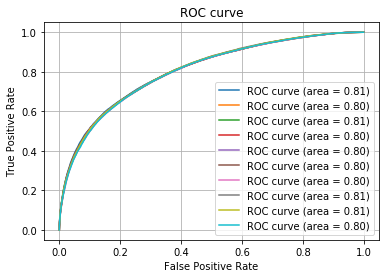

In [34]:
%%time
# 10分割交差検証を指定し、インスタンス化
n_splits = 10
kf = KFold(n_splits, shuffle=True)

# スコアとモデルを格納するリスト
score_list = []
models = []

for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print(f'fold{fold_ + 1} start')
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = y_train[train_index]
    valid_y = y_train[valid_index]
    # lab.Datasetを使って,trainとvalidを作っておく
    lgb_train= lgb.Dataset(train_x, train_y)
    lgb_valid = lgb.Dataset(valid_x, valid_y)

    # パラメータを定義
    lgbm_params = {'objective': 'binary'}                                                                                               
          
    # 学習
    gbm = lgb.train(params = lgbm_params,
                    train_set = lgb_train, 
                    num_boost_round = 200,
                    valid_sets = [lgb_train, lgb_valid],
                    early_stopping_rounds = 20,
                    verbose_eval = -1 # 学習の状況を表示しない
                   )

    oof = gbm.predict(valid_x)
    print('oof:', oof)
    # AUC算出
    # auc = metrics.auc(valid_y, oof)
    auc = roc_auc_score(valid_y, oof)
    score_list.append(auc) # スコアリストに保存
    # score_list.append(np.sqrt(mean_squared_error(valid_y, oof))) #RMSEを出す
    # score_list.append(round(accuracy_score(valid_y, oof)*100,2)) # 正解率Accuracyを出す。(検証用y, 予測結果)
    print('AUC:', score_list)
    models.append(gbm) # 学習が終わったモデルをリストに入れておく
    print(f'fold{fold_ + 1} end\n' )
    
    # FPR, TPR(, しきい値) を算出
    fpr, tpr, thresholds = metrics.roc_curve(valid_y, oof)
    
    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    
print(score_list, '平均score', round(np.mean(score_list), 2))

In [35]:
# 比較
# p = pd.DataFrame({"actual":valid_y,"pred":oof})
# p.plot(figsize=(15,4))
# print("AUC",round(np.mean(score_list), 2))

In [36]:
# テストデータの予測を格納する。テストデータ列数*分割数列のnumpy行列を作成
test_pred = np.zeros((len(test), n_splits))

for fold_, gbm in enumerate(models):
    pred_ = gbm.predict(test) # testを予測
    test_pred[:, fold_] = pred_

result = pd.DataFrame({
    'purchase_id': test.index.values,
    'probability': np.mean(test_pred, axis=1)
})
result.to_csv('../output/submit.csv',header=False,index=False)

In [37]:
import datetime
dt_now = datetime.datetime.now()
print(dt_now)
print("予測完了")

2019-11-22 12:25:49.069974
予測完了
